# Coronary Heart Disease Prediction Classification Project

Julia Chen - CSPB 3022

## Project Topic 

Coronary heart disease (CHD) is a type of heart disease where the arteries of the heart cannot deliver enough oxygen-rich blood to the heart and it is the leading cause of death in the United States. Coronary heart disease occurs when plaque builds up in the arteries. The plaque can also cause blood clots which are the most common cause of heart attacks.[<sup>1</sup>](#fn1) It would be beneficial for patients if they were able to receive a reliable prediction of CHD while only undergoing the fewest and least invasive procedures for diagnosis.

This classification project attempts to predict if someone has CHD based on measurements which do not include coronary angiography, which is considered the gold standard for diagnosing coronary artery disease.[<sup>2</sup>](#fn2) In particular I would like to investigate which of the 13 features are most predictive of CHD so patients will undergo only the most necessary tests.

## Data Source and Description

The dataset contains 303 observations, 13 features, and 1 target attribute from one csv file. The target variable represents the diagnosis of CHD determined by coronary angiogram. The value 0 represents absence of CHD and values 1-4 represents presence of CHD.

The dataset was downloaded from https://www.kaggle.com/datasets/aavigan/cleveland-clinic-heart-disease-dataset which was derived from the Heart Disease dataset available on the UCI Machine Learning Repository, Janosi et al. (1988).[<sup>3</sup>](#fn3) The data was collected by Robert Detrano, M.D., Ph.D at the Cleveland Clinic Foundation.

### Feature Information

* age: discrete numerical
* sex: discrete numerical where value 1 is male, 0 is female
* cp (chest pain type): discrete numerical with four possible values (1,2,3,4)
* trestbps (resting blood pressure): discrete numerical
* chol (serum cholesterol): discrete numerical
* fbs (fasting blood sugar): discrete numerical with two possible values (1,0)
* restecg (resting electrocardiographic results): discrete numerical with three possible values (0,1,2)
* thalach (maximum heart rate achieved):  discrete numerical
* exang (exercise induced angina): discrete numerical with two possible values (1,0)
* oldpeak (ST depression induced by exercise relative to rest): continuous numerical
* slope (the slope of the peak exercise ST segment): discrete numerical with three possible values (1,2,3)
* ca (number of major vessels colored by fluoroscopy): discrete numerical with four possible values (0,1,2,3)
* thal (thallium stress test): discrete numerical with three possible values (3,6,7)
* num (angiographic disease status): discrete numerical with five possible values (0,1,2,3,4)

### Why These Features?

**Age** \
Adults 65 and older are more likely to have cardiovascular disease. Aging can cause changes in the heart and blood vessels that may increase the likelihood of developing cardiovascular disease.

**Sex** \
Heart disease is the number one cause of death for both women and men in America. Men usually develop heart disease at an earlier age than women. After menopause women are at higher risk of coronary artery disease because of the hormonal changes they go through.

**Chest Pain Type (cp)** \
Angina is chest pain caused by reduced blood flow to the heart. It is a symptom of CHD. The chest pain may feel like: burning, fullness, pressure, or squeezing. Other symptoms of angina include: dizziness, fatigue, nausea, shortness of breath, and sweating.

**Resting Blood Pressure** \
High blood pressure (hypertension) may damage arteries by accelerating the hardening of the arteries. Hypertension is a major contributor to coronary heart disease and stroke.

**Total Cholesterol (chol)** \
High levels of cholesterol may increase your risk of heart disease. High cholesterol causes fatty deposits to develop in blood vessels. These deposits can grow and reduce the amount of blood flow through arteries.

**Fasting Blood Sugar (fbs)** \
Measurement of blood sugar after an overnight fast. A fasting blood sugar level of 99 mg/dL or lower is normal, 100 to 125 mg/dL indicates prediabetes, and 126 mg/dL or higher indicates diabetes. High blood sugar can damage blood vessels and the nerves that control the heart.[<sup>4</sup>](#fn4)

**Resting Electrocardiographic Results (restecg)** \
An ECG can detect problems with heart rate and heart rhythm. It can show evidence of a current heart attack or a heart attack in the past.

**Maximum Heart Rate Achieved (thalach)** \
During exercise testing a lowered heart rate response was associated with an increased risk of coronary heart disease.[<sup>5</sup>](#fn5)

**Exercise Induced Angina (exang)** \
Angina occurs when there's not enough blood flow to the heart. If the blood flow is too low, the heart will not get enough oxygen and this leads to chest pain. Blocked arteries from coronary artery disease are the most common cause of angina.

**ST Depression Induced by Exercise Relative to Rest (oldpeak)** \
Exercise-induced ST-segment depression is a reliable electrocardiographic (ECG) finding for a diagnosis of coronary artery disease.[<sup>6</sup>](#fn6) 

**Slope of the Peak Exercise ST Segment (slope)** \
Another electrocardiographic finding where flat, downsloping, or depressed ST segments may indicate coronary ischemia.

**Number of Major Vessels Colored by Fluoroscopy (ca)** \
Fluoroscopy shows blood flow through the arteries. It can help cardiologists to identify the blocked arteries.

**Thallium stress test (thal)** \
A thallium stress test indicates how well blood flows into your heart while you're exercising or at rest. It also helps a doctor visualize if you have had damage done to your heart. It's also called a nuclear stress test.

## Data Cleaning

As the dataset is small, a manual check of the 303 rows showed 6 invalid entries in columns cardiac fluoroscopy and thallium stress test. I used the average values for each column to fill in the NaN entries. I then displayed the first 5 entries so we can get a look at the dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
import pandas as pd
import seaborn as sns
import patsy
import sklearn
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
# Import data, set '?' values to NaN
chd_df =  pd.read_csv('processed_cleveland.csv', na_values=['?'])

# Update ca and thal NaN values to average of each column
chd_df.ca = chd_df.ca.fillna( chd_df.ca.mean() )
chd_df.thal = chd_df.thal.fillna( chd_df.thal.mean() )

# Display first 5 rows
chd_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


### Basic Statistics of the Dataset

In [3]:
chd_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209,1.933272,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In reviewing each feature, the min and max values are consistent with the allowed values from the study.

### Data Type of Each Column

In [4]:
chd_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object

The only continuous numerical is oldpeak but "ca" and "thal" are also showing up as floats. I updated those two features to be ints.

In [5]:
# Update data types
chd_df.ca = chd_df.ca.astype('int')
chd_df.thal = chd_df.thal.astype('int')

# Display updated data types
chd_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
num           int64
dtype: object

### Balanced Data

For a classification task it would be best if the number of CHD positive and CHD negative patients are similar. Let's take a look at the breakdown in our dataset.

CHD Negative make up 54.12541254125413 % of the dataset
CHD Positive make up 45.87458745874587 % of the dataset


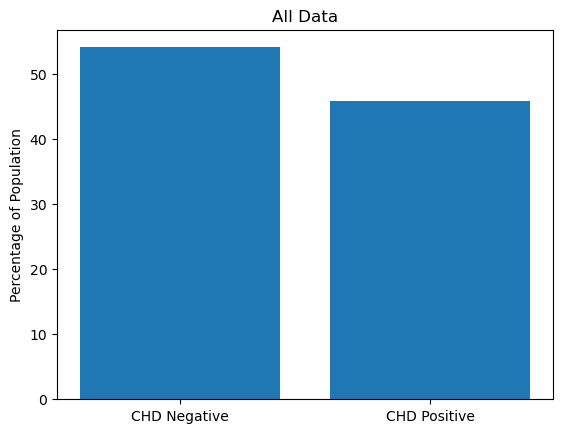

In [6]:
num_pos = len(chd_df[chd_df.num != 0])/ len(chd_df)
num_neg = len(chd_df[chd_df.num == 0])/len(chd_df)

plt.bar(['CHD Negative', 'CHD Positive'], [num_neg*100, num_pos*100])
plt.title("All Data")
plt.ylabel('Percentage of Population')

print("CHD Negative make up", num_neg*100, "% of the dataset")
print("CHD Positive make up", num_pos*100, "% of the dataset")

Our dataset is not perfectly balanced but it is close (54.1% vs 45.9%). I will not remove any rows yet but leave that as a possibility once I have had a chance to test my models.

### New Column for CHD Diagnosis

Currently the target column, num, can take values 0,1,2,3,4. The value 0 represents absence of CHD and values 1-4 represents presence of CHD. I will add a new column "chd" with either 0 for negative CHD or 1 for positive CHD.

In [7]:
chd_df['chd'] = (chd_df['num'] != 0).astype('int')
chd_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chd
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,0


### Outliers

Strip plots for all of the features are displayed below.

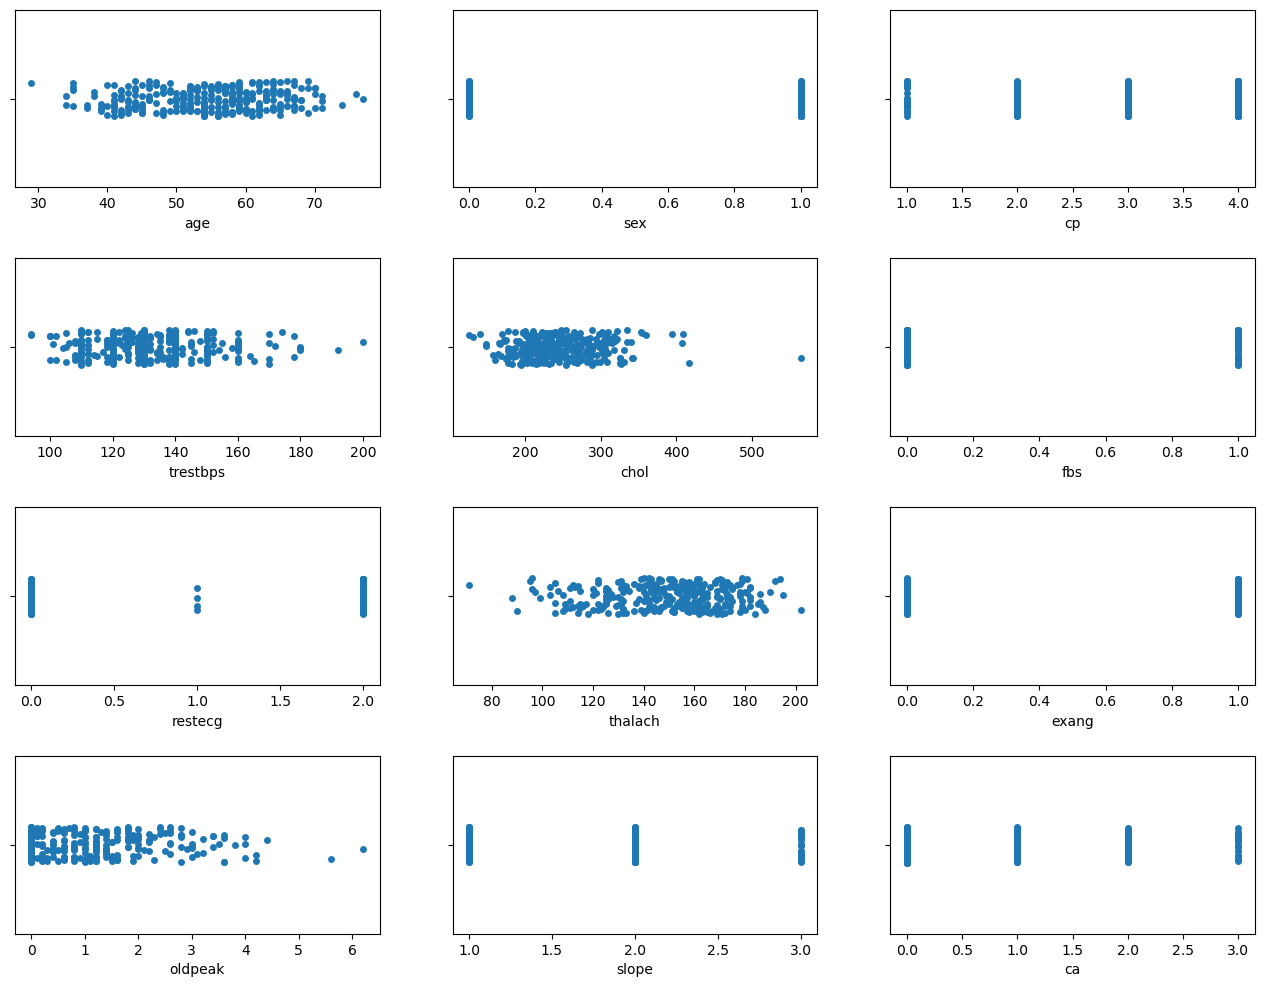

In [8]:
fig,ax = plt.subplots(nrows=4,ncols=3,figsize=(16,12))
plt.subplots_adjust(hspace=0.4)

c = 0;
for k in range(4):
    for i in range(3):
        sns.stripplot(x=chd_df[chd_df.columns[c]], ax=ax[k][i]);
        ax[k][i].set_xlabel(chd_df.columns[c])
        c += 1

From a visual inspection of the strip plots we can see the one data point of feature "chol" of 564 is concerning. It is clearly a significant outlier and I will remove it from the dataset. The other features do not show outliers at the same significance level. As my dataset is small, I do not want to remove data which may imply an outlier but could be due to having a small dataset.

In [9]:
# Inspect the outlier
outlier_chd_df = chd_df.loc[(chd_df['chol'] > 500)]
outlier_chd_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chd
152,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0,0


In [10]:
# Print index of outlier
index_list = list(outlier_chd_df.index)
print(index_list)

[152]


In [11]:
# Remove outlier from dataframe
chd_df = chd_df.drop(index_list)
print(len(chd_df))

302


## Exploratory Data Analysis

To start my exploratory data analysis I will look at each of the 13 features and compare the distributions of each factor for CHD positive vs CHD negative populations. I will also see if I able to visually select features which appear to be more important in determining if a patient is CHD positive.

### Age

A boxplot and histogram are displayed first for the first factor, age. We can see the age is skewed towards higher ages which makes sense as heart problems would likely be investigated in an older population.

Mean age of all data:  54.397350993377486


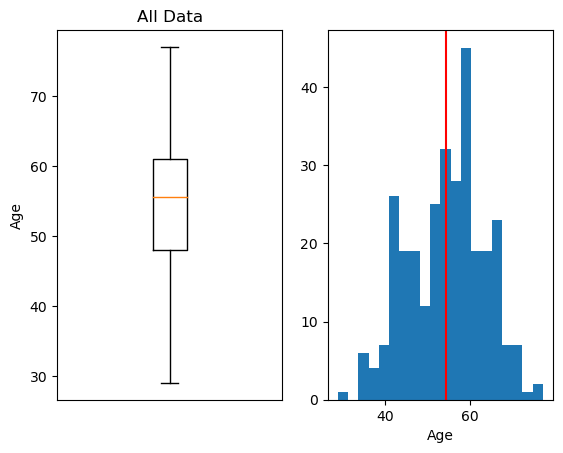

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2)
data_age = pd.Series(chd_df['age'].values)
ax[0].boxplot(x=chd_df["age"])
ax[1].hist(data_age, bins=20)
ax[1].axvline(chd_df["age"].mean(),color='red')

ax[0].title.set_text('All Data')
ax[0].set_ylabel('Age')
ax[1].set_xlabel('Age')
plt.setp(ax[0], xticks=[])

print('Mean age of all data: ', np.mean(data_age))

Next I compare the age distribution between those who have been diagnosed with CHD and those who have not.

Mean age of CHD negative datset:  52.49693251533742
Mean age of CHD positive dataset:  56.62589928057554


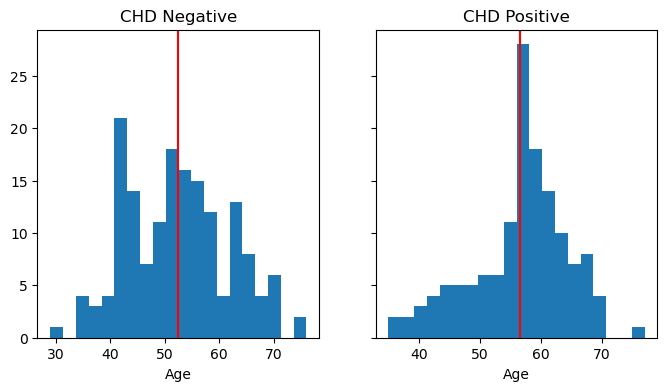

In [13]:
# Select patients w/ CHD
data_chd = chd_df[chd_df['chd'] == 1] 
# Select patients w/o CHD
data_nchd = chd_df[chd_df['chd'] == 0] 

data_chd_age = pd.Series(data_chd['age'].values)
data_nchd_age = pd.Series(data_nchd['age'].values)

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4), sharey=True)
ax[0].hist(data_nchd_age, bins=20)
ax[1].hist(data_chd_age, bins=20)
ax[0].set_xlabel('Age')
ax[1].set_xlabel('Age')
ax[0].title.set_text('CHD Negative')
ax[1].title.set_text('CHD Positive')
ax[0].axvline(np.mean(data_nchd_age),color='red')
ax[1].axvline(np.mean(data_chd_age),color='red')

print('Mean age of CHD negative datset: ', np.mean(data_nchd_age))
print('Mean age of CHD positive dataset: ', np.mean(data_chd_age))

The CHD positive mean age is approximately 56 while the CHD negative mean age is approximately 52. We can also see in the distributions that the CHD negative population is more spread out through the different age groups while the CHD positive population is centered around the 55 to 65 age group.

### Sex
The second feature is sex. Is CHD more likely in men or women in this dataset? Women make up approximately 32% of the dataset and men 68%. This means the dataset is significantly weighted towards men.

Women make up  31.788079470198678 % of the dataset
Men make up  68.21192052980133 % of the dataset


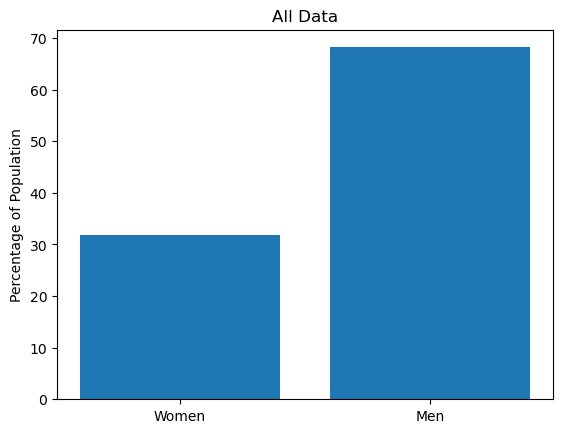

In [14]:
# Value of 1 is male, 0 is female
men_per = len(chd_df[chd_df.sex == 1])/ len(chd_df)
women_per = len(chd_df[chd_df.sex == 0])/len(chd_df)
plt.bar(['Women', 'Men'], [women_per*100, men_per*100])
plt.title("All Data")
plt.ylabel('Percentage of Population')

print("Women make up ", women_per*100, "% of the dataset")
print("Men make up ", men_per*100, "% of the dataset")

We have more men in the dataset but does that mean they are also more likely to be diagnosed with CHD? Let's compare the CHD positive and CHD negative populations.

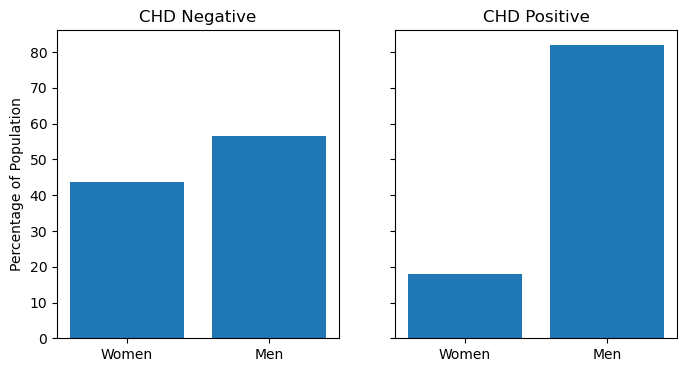

In [15]:
men_chd_per = len(data_chd[data_chd.sex == 1])/ len(data_chd)
women_chd_per = len(data_chd[data_chd.sex == 0])/len(data_chd)

men_nchd_per = len(data_nchd[data_nchd.sex == 1])/ len(data_nchd)
women_nchd_per = len(data_nchd[data_nchd.sex == 0])/len(data_nchd)

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4), sharey=True)
ax[0].bar(['Women', 'Men'], [women_nchd_per*100, men_nchd_per*100])
ax[1].bar(['Women', 'Men'], [women_chd_per*100, men_chd_per*100])

ax[0].set_ylabel('Percentage of Population')
ax[0].title.set_text('CHD Negative')
ax[1].title.set_text('CHD Positive')

The CHD negative population has a fairly close percentage of women and men. The CHD positive population is clearly skewed towards men. This appears to be a significant feature for the prediction of positive CHD.

### Chest Pain Type
The third feature is chest pain type (cp) which is measured the following way:
* Value 1: typical angina
* Value 2: atypical angina
* Value 3: non-anginal pain
* Value 4: asymptomatic

First we'll look at the distribution of chest pain type for the entire dataset. 

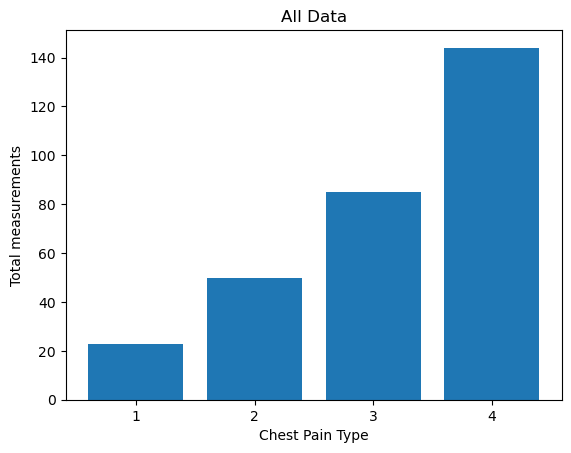

In [16]:
d_1 = len(chd_df[chd_df.cp == 1])
d_2 = len(chd_df[chd_df.cp == 2])
d_3 = len(chd_df[chd_df.cp == 3])
d_4 = len(chd_df[chd_df.cp == 4])

plt.bar(['1', '2', '3', '4'], [d_1,d_2,d_3,d_4])
plt.xlabel("Chest Pain Type")
plt.title("All Data")
plt.ylabel('Total measurements');

The most common chest pain type is 4, asymptomatic. Next we'll compare the CHD negative and CHD positive populations.

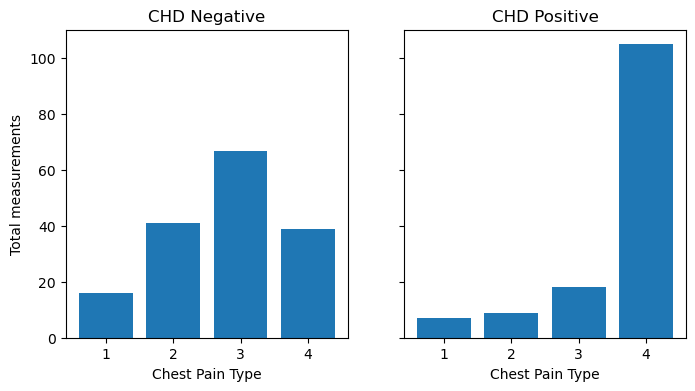

In [17]:
d_chd_1 = len(data_chd[data_chd.cp == 1])
d_chd_2 = len(data_chd[data_chd.cp == 2])
d_chd_3 = len(data_chd[data_chd.cp == 3])
d_chd_4 = len(data_chd[data_chd.cp == 4])

d_nchd_1 = len(data_nchd[data_nchd.cp == 1])
d_nchd_2 = len(data_nchd[data_nchd.cp == 2])
d_nchd_3 = len(data_nchd[data_nchd.cp == 3])
d_nchd_4 = len(data_nchd[data_nchd.cp == 4])

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4), sharey=True)
ax[0].bar(['1', '2', '3', '4'], [d_nchd_1,d_nchd_2,d_nchd_3,d_nchd_4])
ax[1].bar(['1', '2', '3', '4'], [d_chd_1,d_chd_2,d_chd_3,d_chd_4])

ax[0].set_xlabel('Chest Pain Type')
ax[1].set_xlabel('Chest Pain Type')
ax[0].set_ylabel('Total measurements')
ax[0].title.set_text('CHD Negative')
ax[1].title.set_text('CHD Positive')

Interestingly we can see from our plots that the CHD positive patients mostly had type 4 (asymptomatic) pain, while the CHD negative patients mostly had type 3, non-anginal pain. This appears to be a significant feature for the prediction of positive CHD.

### Resting Blood Pressure

The fourth feature is resting blood pressure (in mm Hg on admission to the hospital). Blood pressure numbers of less than 120 systolic is considered within the normal range.[<sup>7</sup>](#fn7) The mean of the full dataset is approximately 132 which shows the mean of our dataset has a higher than normal resting blood pressure.

Mean of dataset:  131.74503311258277


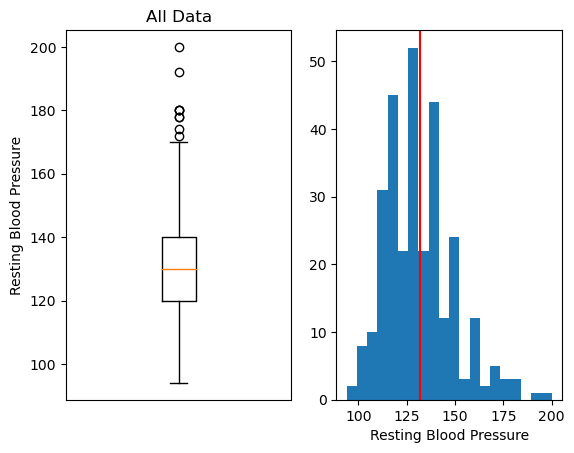

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2)
data_trestbps = pd.Series(chd_df['trestbps'].values)
ax[0].boxplot(x=chd_df["trestbps"])
ax[1].hist(data_trestbps, bins=20)
ax[1].axvline(chd_df["trestbps"].mean(),color='red')

ax[0].set_ylabel('Age')
ax[1].set_xlabel('Age')
plt.setp(ax[0], xticks=[])

ax[0].title.set_text('All Data')
ax[0].set_ylabel('Resting Blood Pressure')
ax[1].set_xlabel('Resting Blood Pressure')

print('Mean of dataset: ', np.mean(data_trestbps))

Next I compare the CHD negative population to the CDH positive population.

Mean of CHD negative dataset:  129.33742331288343
Mean of CHD positive dataset:  134.568345323741


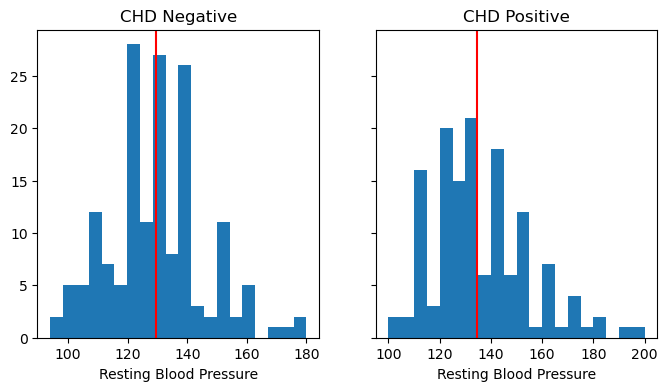

In [19]:
data_chd_trestbps = pd.Series(data_chd['trestbps'].values)
data_nchd_trestbps = pd.Series(data_nchd['trestbps'].values)

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4), sharey=True)
ax[0].hist(data_nchd_trestbps, bins=20)
ax[1].hist(data_chd_trestbps, bins=20)
ax[0].set_xlabel('Resting Blood Pressure')
ax[1].set_xlabel('Resting Blood Pressure')
ax[0].title.set_text('CHD Negative')
ax[1].title.set_text('CHD Positive')
ax[0].axvline(np.mean(data_nchd_trestbps),color='red')
ax[1].axvline(np.mean(data_chd_trestbps),color='red')

print('Mean of CHD negative dataset: ', np.mean(data_nchd_trestbps))
print('Mean of CHD positive dataset: ', np.mean(data_chd_trestbps))

The resting blood pressure mean is only slightly elevated with an increase of about 5 in the CHD positive patients versus the CHD negative patients.

### Serum Cholesterol
The fifth feature is serum cholesterol, or total cholesterol, in mg/dl. Below 200 is considered a good number for a healthy individual.[<sup>8</sup>](#fn8)

The mean of our dataset is approximately 246, so we have a population with an elevated total cholesterol level.

Mean of dataset:  245.64238410596028


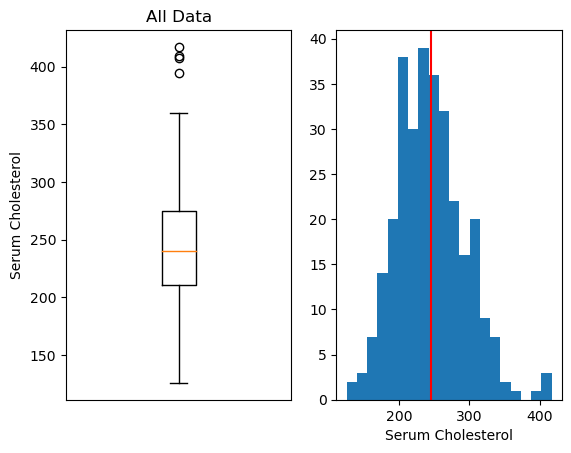

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2)
data_chol = pd.Series(chd_df['chol'].values)
ax[0].boxplot(x=chd_df["chol"])
ax[1].hist(data_chol, bins=20)
ax[1].axvline(chd_df["chol"].mean(),color='red')

ax[0].title.set_text('All Data')
ax[0].set_ylabel('Serum Cholesterol')
ax[1].set_xlabel('Serum Cholesterol')
plt.setp(ax[0], xticks=[])

print('Mean of dataset: ', np.mean(data_chol))

Next we compare CHD positive vs CHD negative populations.

Mean of CHD negative dataset:  240.66871165644173
Mean of CHD positive dataset:  251.4748201438849


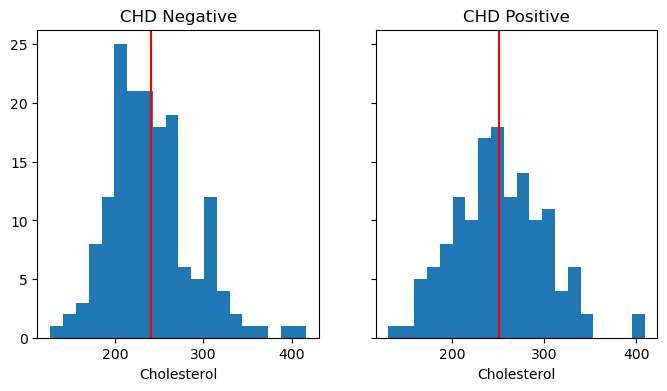

In [21]:
# Fifth feature: chol
data_chd_chol = pd.Series(data_chd['chol'].values)
data_nchd_chol = pd.Series(data_nchd['chol'].values)

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4), sharey=True)
ax[0].hist(data_nchd_chol, bins=20)
ax[1].hist(data_chd_chol, bins=20)
ax[0].set_xlabel('Cholesterol')
ax[1].set_xlabel('Cholesterol')
ax[0].title.set_text('CHD Negative')
ax[1].title.set_text('CHD Positive')
ax[0].axvline(np.mean(data_nchd_chol),color='red')
ax[1].axvline(np.mean(data_chd_chol),color='red')

print('Mean of CHD negative dataset: ', np.mean(data_nchd_chol))
print('Mean of CHD positive dataset: ', np.mean(data_chd_chol))

We can see the mean of the CHD positive patients is slightly elevated by approximately 9.

### Fasting Blood Sugar
The sixth feature measures fasting blood sugar where if the value was greater than 120 mg/dl, 1 was entered (true), otherwise 0 (false). I first display the distribution of the entire dataset.

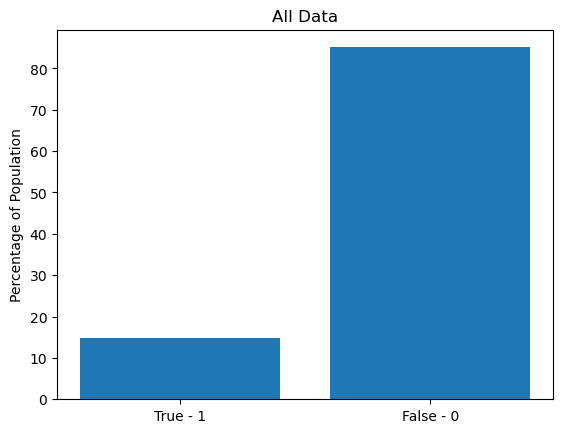

In [22]:
# Sixth feature: fbs
# Value of 1 is > 120, otherwise 0
one_per = len(chd_df[chd_df.fbs == 1])/ len(chd_df)
zero_per = len(chd_df[chd_df.fbs == 0])/len(chd_df)

plt.bar(['True - 1', 'False - 0'], [one_per*100, zero_per*100])
plt.title("All Data")
plt.ylabel('Percentage of Population');

Clearly most of the dataset falls into the "False" category which means the fasting blood suger was less than 120 mg/dl.

Next we compare the CHD negative population to the CHD positive population.

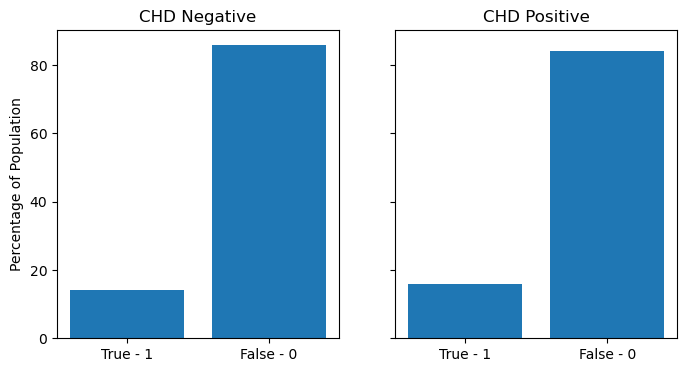

In [23]:
one_chd_per = len(data_chd[data_chd.fbs == 1])/ len(data_chd)
zero_chd_per = len(data_chd[data_chd.fbs == 0])/len(data_chd)

one_nchd_per = len(data_nchd[data_nchd.fbs == 1])/ len(data_nchd)
zero_nchd_per = len(data_nchd[data_nchd.fbs == 0])/len(data_nchd)

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4), sharey=True)
ax[0].bar(['True - 1', 'False - 0'], [one_nchd_per*100, zero_nchd_per*100])
ax[1].bar(['True - 1', 'False - 0'], [one_chd_per*100, zero_chd_per*100])

ax[0].set_ylabel('Percentage of Population')
ax[0].title.set_text('CHD Negative')
ax[1].title.set_text('CHD Positive')

There doesn't appear to be a visually significant difference between the two populations.

### Resting Electrocardiographic

The seventh feature measures resting electrocardiographic results where:
* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

We first take a look at the distribution of the entire dataset.

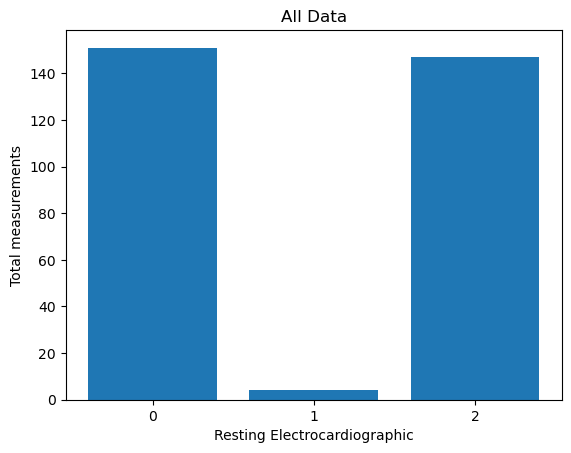

In [24]:
# 7th feature: restecg
ecg_0 = len(chd_df[chd_df.restecg == 0])
ecg_1 = len(chd_df[chd_df.restecg == 1])
ecg_2 = len(chd_df[chd_df.restecg == 2])

plt.bar(['0', '1', '2'], [ecg_0,ecg_1,ecg_2])
plt.xlabel("Resting Electrocardiographic")
plt.ylabel('Total measurements')
plt.title("All Data");

The values of 0 and 2 are clearly the most common values. Next we compare the CHD negative population to the CHD positive population.

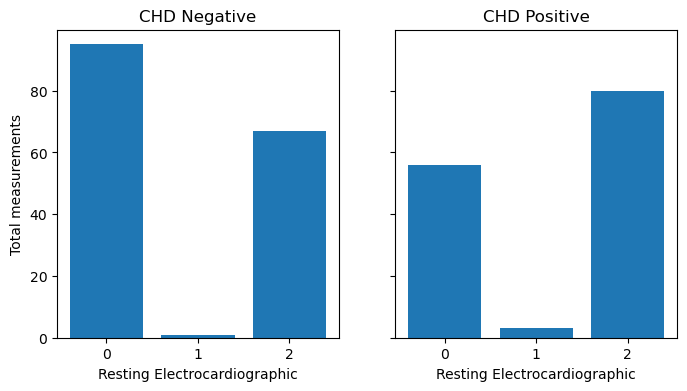

In [25]:
ecg_chd_0 = len(data_chd[data_chd.restecg == 0])
ecg_chd_1 = len(data_chd[data_chd.restecg == 1])
ecg_chd_2 = len(data_chd[data_chd.restecg == 2])

ecg_nchd_0 = len(data_nchd[data_nchd.restecg == 0])
ecg_nchd_1 = len(data_nchd[data_nchd.restecg == 1])
ecg_nchd_2 = len(data_nchd[data_nchd.restecg == 2])

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4), sharey=True)
ax[0].bar(['0', '1', '2'], [ecg_nchd_0,ecg_nchd_1,ecg_nchd_2])
ax[1].bar(['0', '1', '2'], [ecg_chd_0,ecg_chd_1,ecg_chd_2])

ax[0].set_xlabel('Resting Electrocardiographic')
ax[1].set_xlabel('Resting Electrocardiographic')
ax[0].set_ylabel('Total measurements')
ax[0].title.set_text('CHD Negative')
ax[1].title.set_text('CHD Positive')

We can see the CHD positive has a slightly elevated count for the type 2 resting electrocardiographic measurement while the CHD negative population has an elevated type 0. The distributions don't appear to be significantly different than the distribution for the entire dataset.

### Maximum Heart Rate Achieved

The eighth feature is the maximum heart rate achieved. We first take a look at the distribution for the entire dataset.

Mean of dataset:  149.5728476821192


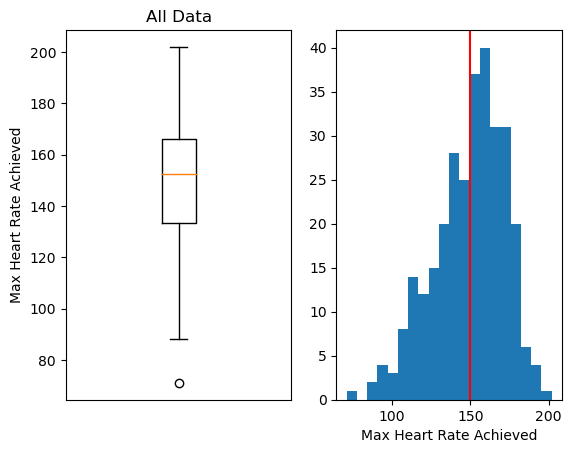

In [26]:
# 9th feature: thalach
fig, ax = plt.subplots(nrows=1, ncols=2)
data_thalach = pd.Series(chd_df['thalach'].values)
ax[0].boxplot(x=chd_df["thalach"])
ax[1].hist(data_thalach, bins=20)
ax[1].axvline(chd_df["thalach"].mean(),color='red')

ax[0].title.set_text('All Data')
ax[0].set_ylabel('Max Heart Rate Achieved')
ax[1].set_xlabel('Max Heart Rate Achieved')
plt.setp(ax[0], xticks=[])

print('Mean of dataset: ', np.mean(data_thalach))

The mean of the entire dataset is approximately 149. Next we compare the CHD negative population to the CHD positive population.

Mean of CHD negative dataset:  158.3680981595092
Mean of CHD positive dataset:  139.25899280575538


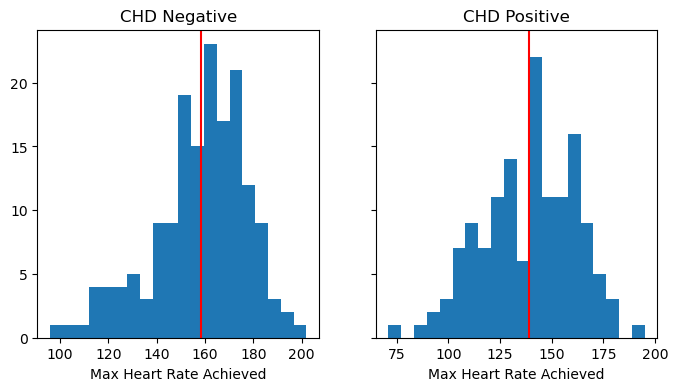

In [27]:
data_chd_thalach = pd.Series(data_chd['thalach'].values)
data_nchd_thalach = pd.Series(data_nchd['thalach'].values)

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4), sharey=True)
ax[0].hist(data_nchd_thalach, bins=20)
ax[1].hist(data_chd_thalach, bins=20)
ax[0].set_xlabel('Max Heart Rate Achieved')
ax[1].set_xlabel('Max Heart Rate Achieved')
ax[0].title.set_text('CHD Negative')
ax[1].title.set_text('CHD Positive')
ax[0].axvline(np.mean(data_nchd_thalach),color='red')
ax[1].axvline(np.mean(data_chd_thalach),color='red')

print('Mean of CHD negative dataset: ', np.mean(data_nchd_thalach))
print('Mean of CHD positive dataset: ', np.mean(data_chd_thalach))

The CHD negative population was able to achieve a higher maximum heart rate by approximately 19. This appears to be a significant feature for the prediction of positive CHD.

### Exercise Induced Angina

The ninth feature is exercise induced angina where 1 = yes and 0 = no. Angina is a type of chest pain caused by reduced blood flow to the heart. We first take a look at the distribution for the entire dataset.

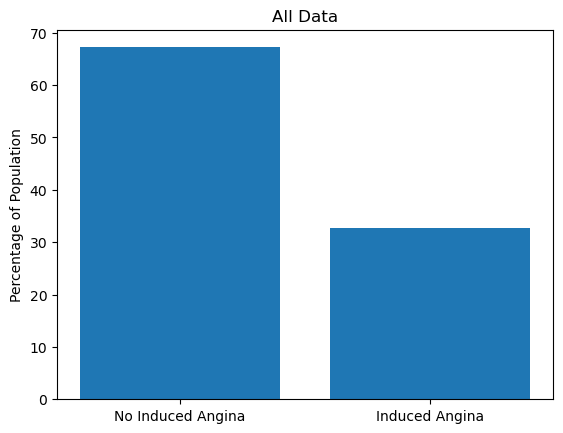

In [28]:
# 9th feature: exang
exang_0 = len(chd_df[chd_df.exang == 0])/len(chd_df)
exang_1 = len(chd_df[chd_df.exang == 1])/len(chd_df)

plt.bar(['No Induced Angina', 'Induced Angina'], [exang_0*100, exang_1*100])
plt.title("All Data")
plt.ylabel('Percentage of Population');

For the entire dataset, most people did not have exercise induced angina.

Next we compare the CHD negative population to the CHD positive population.

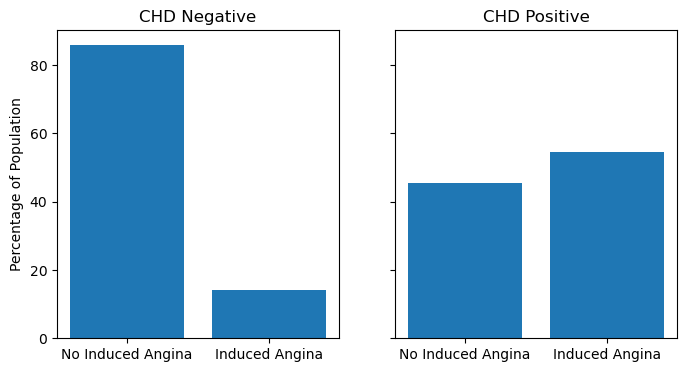

In [29]:
exang_chd_0 = len(data_chd[data_chd.exang == 0])/len(data_chd)
exang_chd_1 = len(data_chd[data_chd.exang == 1])/len(data_chd)

exang_nchd_0 = len(data_nchd[data_nchd.exang == 0])/len(data_nchd)
exang_nchd_1 = len(data_nchd[data_nchd.exang == 1])/len(data_nchd)

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4), sharey=True)
ax[0].bar(['No Induced Angina', 'Induced Angina'], [exang_nchd_0*100,exang_nchd_1*100])
ax[1].bar(['No Induced Angina', 'Induced Angina'], [exang_chd_0*100,exang_chd_1*100])

ax[0].set_ylabel('Percentage of Population')
ax[0].title.set_text('CHD Negative')
ax[1].title.set_text('CHD Positive')

The CHD Negative population is skewed towards no induced angina, while the CHD positive population is more evenly distributed between the two. This appears to be a significant feature for the prediction of positive CHD.

### ST Depression

The tenth feature is ST depression induced by exercise relative to rest. We first look at the distribution of the entire dataset.

Mean of dataset:  1.0377483443708608


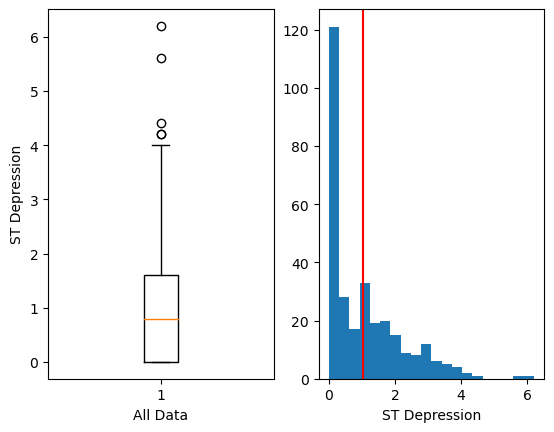

In [30]:
# 10th feature: oldpeak
fig, ax = plt.subplots(nrows=1, ncols=2)
data_oldpeak = pd.Series(chd_df['oldpeak'].values)
ax[0].boxplot(x=chd_df["oldpeak"])
ax[1].hist(data_oldpeak, bins=20)
ax[1].axvline(chd_df["oldpeak"].mean(),color='red')
ax[0].set_xlabel('All Data')
ax[0].set_ylabel('ST Depression')
ax[1].set_xlabel('ST Depression')

print('Mean of dataset: ', np.mean(data_oldpeak))

The mean of the dataset is approximately 1.04. Next we compare the CHD negative population to the CHD positive population.

Mean of CHD negative dataset:  0.5803680981595092
Mean of CHD positive dataset:  1.5741007194244605


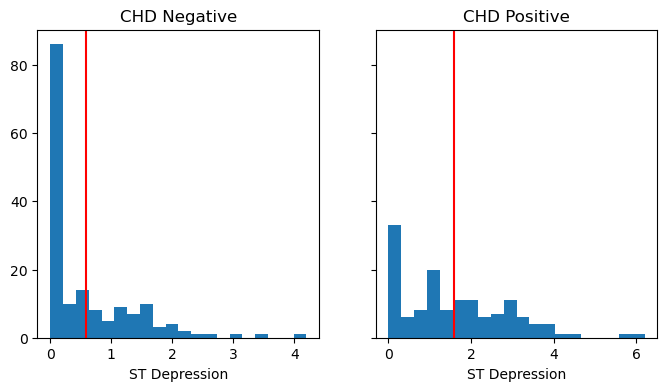

In [31]:
data_chd_oldpeak = pd.Series(data_chd['oldpeak'].values)
data_nchd_oldpeak = pd.Series(data_nchd['oldpeak'].values)

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4), sharey=True)
ax[0].hist(data_nchd_oldpeak, bins=20)
ax[1].hist(data_chd_oldpeak, bins=20)
ax[0].set_xlabel('ST Depression')
ax[1].set_xlabel('ST Depression')
ax[0].title.set_text('CHD Negative')
ax[1].title.set_text('CHD Positive')
ax[0].axvline(np.mean(data_nchd_oldpeak),color='red')
ax[1].axvline(np.mean(data_chd_oldpeak),color='red')

print('Mean of CHD negative dataset: ', np.mean(data_nchd_oldpeak))
print('Mean of CHD positive dataset: ', np.mean(data_chd_oldpeak))

The mean of the CHD positive population is greater than the CHD negative population by approximately 1.

### Slope of the Peak

The eleventh feature is the slope of the peak exercise ST segment. It is measured by:
* Value 1: upsloping
* Value 2: flat
* Value 3: downsloping

We first take a look at the distribution of the entire dataset.

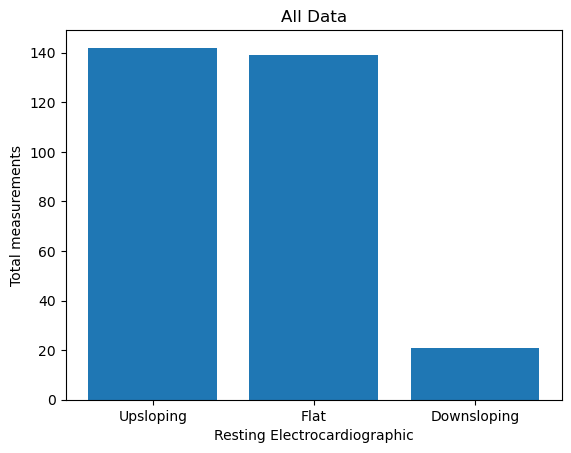

In [32]:
# 11th feature: slope
slope_1 = len(chd_df[chd_df.slope == 1])
slope_2 = len(chd_df[chd_df.slope == 2])
slope_3 = len(chd_df[chd_df.slope == 3])

plt.bar(['Upsloping', 'Flat', 'Downsloping'], [slope_1,slope_2,slope_3])
plt.xlabel("Resting Electrocardiographic")
plt.ylabel('Total measurements')
plt.title("All Data");

Upsloping and flat are fairly even while downsloping shows up much less. Next we compare the CHD negative population to the CHD positive population.

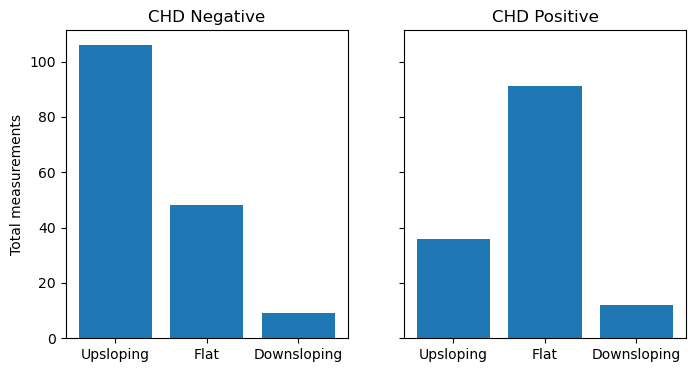

In [33]:
slope_chd_1 = len(data_chd[data_chd.slope == 1])
slope_chd_2 = len(data_chd[data_chd.slope == 2])
slope_chd_3 = len(data_chd[data_chd.slope == 3])

slope_nchd_1 = len(data_nchd[data_nchd.slope == 1])
slope_nchd_2 = len(data_nchd[data_nchd.slope == 2])
slope_nchd_3 = len(data_nchd[data_nchd.slope == 3])

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4), sharey=True)
ax[0].bar(['Upsloping', 'Flat', 'Downsloping'], [slope_nchd_1,slope_nchd_2,slope_nchd_3])
ax[1].bar(['Upsloping', 'Flat', 'Downsloping'], [slope_chd_1,slope_chd_2,slope_chd_3])

ax[0].set_ylabel('Total measurements')
ax[0].title.set_text('CHD Negative')
ax[1].title.set_text('CHD Positive')

In the CHD negative population, upsloping is the most common while in the CHD positive population, flat is the most common. This appears to be a significant feature for the prediction of positive CHD.

### Fluoroscopy
The 12th feature represents the number of major vessels (0-3) colored by fluoroscopy. We first look at the distribution for the entire dataset.

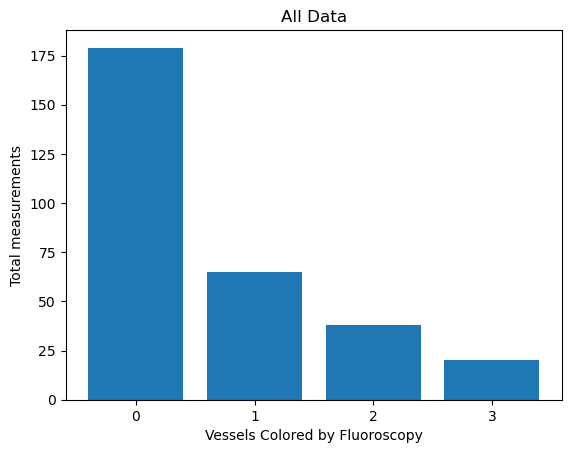

In [34]:
# 12th feature: ca
ca_0 = len(chd_df[chd_df.ca == 0])
ca_1 = len(chd_df[chd_df.ca == 1])
ca_2 = len(chd_df[chd_df.ca == 2])
ca_3 = len(chd_df[chd_df.ca == 3])

plt.bar(['0', '1', '2', '3'], [ca_0,ca_1,ca_2,ca_3])
plt.xlabel("Vessels Colored by Fluoroscopy")
plt.ylabel('Total measurements')
plt.title("All Data");

For the entire dataset, the value of 0 is the most common. Next we compare the distributions of the CHD negative and the CHD positive populations.

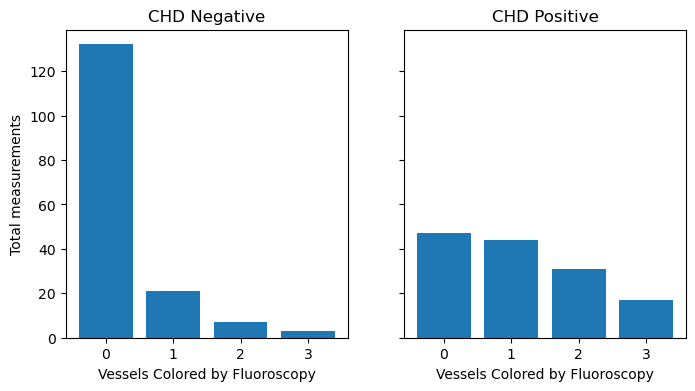

In [35]:
ca_chd_0 = len(data_chd[data_chd.ca == 0])
ca_chd_1 = len(data_chd[data_chd.ca == 1])
ca_chd_2 = len(data_chd[data_chd.ca == 2])
ca_chd_3 = len(data_chd[data_chd.ca == 3])

ca_nchd_0 = len(data_nchd[data_nchd.ca == 0])
ca_nchd_1 = len(data_nchd[data_nchd.ca == 1])
ca_nchd_2 = len(data_nchd[data_nchd.ca == 2])
ca_nchd_3 = len(data_nchd[data_nchd.ca == 3])

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4), sharey=True)
ax[0].bar(['0', '1', '2', '3'], [ca_nchd_0,ca_nchd_1,ca_nchd_2,ca_nchd_3])
ax[1].bar(['0', '1', '2', '3'], [ca_chd_0,ca_chd_1,ca_chd_2,ca_chd_3])

ax[0].set_xlabel('Vessels Colored by Fluoroscopy')
ax[1].set_xlabel('Vessels Colored by Fluoroscopy')
ax[0].set_ylabel('Total measurements')
ax[0].title.set_text('CHD Negative')
ax[1].title.set_text('CHD Positive')

In the CHD negative population, the value of 0 is most common while in the CHD positive population the values are more evenly distributed. This appears to be a significant feature for the prediction of positive CHD.

### Thallium Stress Test 

The 13th feature is a thallium stress test measured as:
* 3 = normal
* 6 = fixed defect
* 7 = reversable defect

First we look at the distribution of the entire dataset.

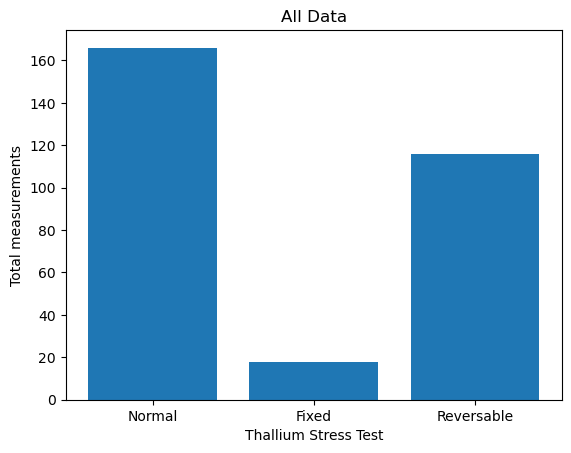

In [36]:
# 13th feature: thal
thal_3 = len(chd_df[chd_df.thal == 3])
thal_6 = len(chd_df[chd_df.thal == 6])
thal_7 = len(chd_df[chd_df.thal == 7])

plt.bar(['Normal', 'Fixed', 'Reversable'], [thal_3,thal_6,thal_7])
plt.xlabel("Thallium Stress Test")
plt.ylabel('Total measurements')
plt.title("All Data");

For the entire dataset, normal is the most common value with reversable second. Next we compare the distributions of the CHD negative and the CHD positive populations.

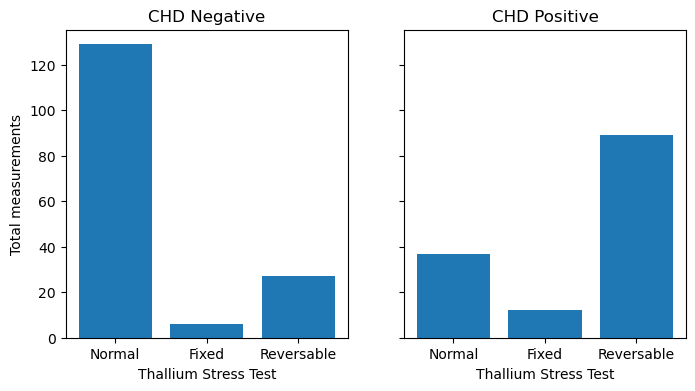

In [37]:
thal_chd_3 = len(data_chd[data_chd.thal == 3])
thal_chd_6 = len(data_chd[data_chd.thal == 6])
thal_chd_7 = len(data_chd[data_chd.thal == 7])

thal_nchd_3 = len(data_nchd[data_nchd.thal == 3])
thal_nchd_6 = len(data_nchd[data_nchd.thal == 6])
thal_nchd_7 = len(data_nchd[data_nchd.thal == 7])

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4), sharey=True)
ax[0].bar(['Normal', 'Fixed', 'Reversable'], [thal_nchd_3,thal_nchd_6,thal_nchd_7])
ax[1].bar(['Normal', 'Fixed', 'Reversable'], [thal_chd_3,thal_chd_6,thal_chd_7])

ax[0].set_xlabel('Thallium Stress Test')
ax[1].set_xlabel('Thallium Stress Test')
ax[0].set_ylabel('Total measurements')
ax[0].title.set_text('CHD Negative')
ax[1].title.set_text('CHD Positive')

For the CHD Negative population, normal is the most common value. For the CHD positive population, reversable is the most common value. This appears to be a significant feature for the prediction of positive CHD.

### Correlations between different features of the dataset

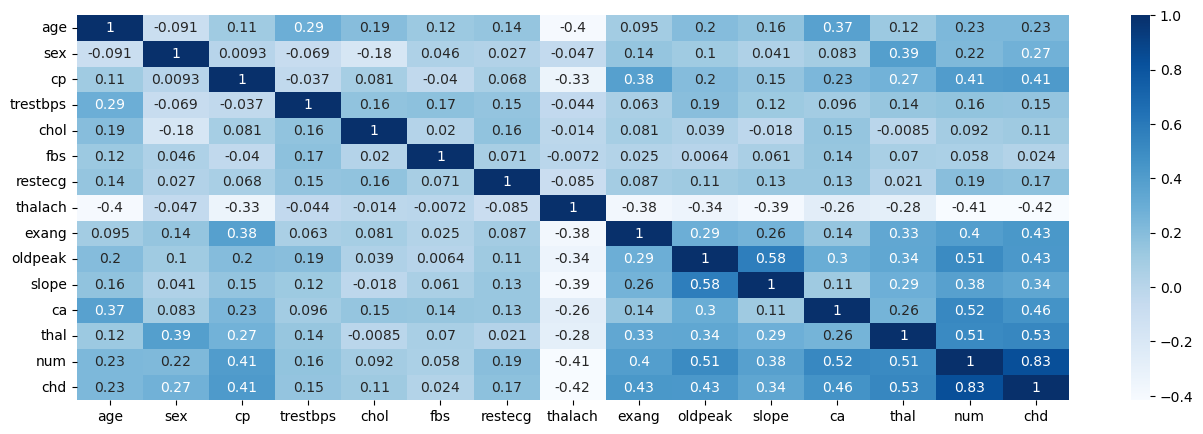

In [38]:
fig, ax = plt.subplots(figsize=(16,5))
correlation = chd_df.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, ax=ax, cmap="Blues");

The closer the correlation coefficient to 1 or –1, the stronger the relationship. The top 6 features that were the most strongly correlated with feature "chd" are:
* Chest pain type (cp)
* Maximum heart rate achieved (thalach)
* Exercise induced angina (exang)
* ST depression induced by exercise relative to rest (oldpeak)
* Number of major vessels colored by fluoroscopy (ca)
* Thallium stress test (thal)

In particular, for the 13 features "thal" had the highest correlation coefficient with "chd" at a value of 0.53.

### Discussion and EDA Summary

Our dataset only had a small number of NaN values which were filled with average values of the corresponding feature. I added a new column, "chd", to encode the values of a negative or positive CHD result based on "num" value. I inspected the features for outliers and removed one row that contained an extreme "chol" value.

From the correlation matrix it shown that "slope" and "oldpeak" are highly correlated with a correlation coeficient of 0.58. The top feature correlated with "chd" is "thal" at 0.53.

During my initial investigation of the individual features there appeared to be 7 features which visually stand out as the mostly likely predictors of CHD:
* Sex
* Chest pain type (cp)
* The slope of the peak exercise ST segment (slope)
* Maximum heart rate achieved (thalach)
* Exercise induced angina (exang)
* Number of major vessels colored by fluoroscopy (ca)
* Thallium stress test (thal)

If we compare this visual test with the correlation matrix results, only ST depression induced by exercise relative to rest (oldpeak) was noticed in the correlation matrix as significant yet left out of our visual inspection for influencing features. It seems reasonable to add that feature as well to our subset of features we want to focus on for an alternative feature set to test our models on. This brings me up to 8 features which are the most likely predictors of CHD from our initial data exporation.

Final list:
* Sex
* Chest pain type (cp)
* The slope of the peak exercise ST segment (slope)
* Maximum heart rate achieved (thalach)
* Exercise induced angina (exang)
* Number of major vessels colored by fluoroscopy (ca)
* Thallium stress test (thal)
* ST depression induced by exercise relative to rest (oldpeak)

Whether or not these are the best predictors is still to be determined. This project will compare using all 13 features to predict CHD along with this subset of features. The goal is to use as few features as possible and still predict CHD reliably (if possible).

## Models

**Linear regression and multiple linear regression** \
Linear regression is useful for predicting a quantitative response, but regression can also be used for a discrete variable if the discrete variable is ordinal. As our task is binary classification, the values in the "chd" column are 0 (no CHD) and 1 (CHD). If the predicted Y is greater than 0.5, we then classify as CHD positive. I can also test different predictor variables to see which one provides the best result. From the correlation matrix the features that appear to be the most promising are number of major vessels colored by fluoroscopy (ca) and the thallium stress test (thal).

As I do have multiple factors I would like to test, multiple linear regression may also be an option. In this case I will be able to have multiple predictors in the model. Some potential problems of using a linear regression model are non-linearity of the response-predictor relationships, correlation of error terms, non-constant variance of error terms, outliers, and collinearity.

**Logistic regression** \
Logistic regression is a more likely model for our binary classification task. Logistic regression models the probability that Y belongs to a specific category. In this model all probabilities will be between 0 and 1, unlike linear regression which can return negative values. It is recommended to avoid the use of highly correlated variables in this model. For example I noticed in the correlation matrix, "slope" has a coefficient of 0.58 with "oldpeak" so I may only be able to include one of those features.

### Split Data into Training and Testing Sets

I will randomly choose 80% of the rows to use for the train dataset and the remaining rows will be in the test dataset.

In [39]:
# Create train dataframe with 80% of data
train_chd_df = chd_df.sample(frac = 0.80)
 
# Creating test dataframe with remaining 20%
test_chd_df = chd_df.drop(train_chd_df.index)

# Verify split is correct
print(len(train_chd_df))
print(len(test_chd_df))

242
60


### Simple Linear Regression

I will run linear regression models for each of the 13 factors print out the R-squared values below. R-squared measures the proportion of variability in Y that can be explained using X. An R-squared value that is close to 1 indicates that a large proportion of the variability in the response has been explained by the model. A number near 0 indicates that the model did not explain the variablity well.

In [40]:
for i in range(13):
    print('R^2 for chd ~ ', train_chd_df.columns[i], ' = ',  smf.ols(formula='chd~'+train_chd_df.columns[i], data=train_chd_df).fit().rsquared)

R^2 for chd ~  age  =  0.049048409758589706
R^2 for chd ~  sex  =  0.07932217932217911
R^2 for chd ~  cp  =  0.13828375400641002
R^2 for chd ~  trestbps  =  0.01615031414370971
R^2 for chd ~  chol  =  0.009522458332276273
R^2 for chd ~  fbs  =  0.0005096060745042319
R^2 for chd ~  restecg  =  0.052223509542501545
R^2 for chd ~  thalach  =  0.17752892352804517
R^2 for chd ~  exang  =  0.18996247654784226
R^2 for chd ~  oldpeak  =  0.1796614678616517
R^2 for chd ~  slope  =  0.1341887369453577
R^2 for chd ~  ca  =  0.22435192039641705
R^2 for chd ~  thal  =  0.24788452756765322


"thal" produces the best R-squared value, although none of the R-squared values are highly significant. It makes sense that no one feature predicts CHD well, as if there was one non-invasive test which could definitely predict CHD the medical community wouldn't run all these other tests. "thal" producing the best R-squared value is not surprising as it had the highest coefficient with "chd" in the correlation matrix.

An additional feature of interest from the linear regression models is "ca" which has the second highest R-squared value.

#### Simple Linear Regression - thal
Let's take a look at the full statistics for "thal" in our linear regression model.

We see the p-value is below the threshold of 0.05 and the confidence interval does not include zero.

In [41]:
chd_l_thal = smf.ols(formula='chd~thal', data=train_chd_df).fit()
chd_l_thal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    chd   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     79.10
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           1.46e-16
Time:                        16:38:55   Log-Likelihood:                -140.17
No. Observations:                 242   AIC:                             284.3
Df Residuals:                     240   BIC:                             291.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1446      0.073     -1.983      0.049      -0.288      -0.001
thal           0.1284      0.014      8.894      0.000       0.100       0.157
==============================================================================
Omnibus:                        9.752   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                5.592
Skew:                           0.185   Prob(JB):                       0.0611
Kurtosis:                       2.354   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### How well does our linear model predict CHD using "thal"?

We need to add a prediction column to the test dataframe that we can use to create a confusion matrix.

In [42]:
# Make prediction from the test set using the parameters from the model
test_chd_df_thal = test_chd_df.copy()
test_chd_df_thal['l_thal_y_hat'] = (chd_l_thal.params[0] + chd_l_thal.params[1]*test_chd_df['thal'])

# Use a threshold of greater than or equal to 0.5 to predict CHD
test_chd_df_thal['predict_l_thal'] = np.where(test_chd_df_thal['l_thal_y_hat'] >= 0.5, 1.0, 0.0)
test_chd_df_thal.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chd,l_thal_y_hat,predict_l_thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,0,0.625946,1.0
13,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0,0,0.754363,1.0
15,57,1,3,150,168,0,0,174,0,1.6,1,0,3,0,0,0.240693,0.0
19,49,1,2,130,266,0,0,171,0,0.6,1,0,3,0,0,0.240693,0.0
21,58,0,1,150,283,1,2,162,0,1.0,1,0,3,0,0,0.240693,0.0


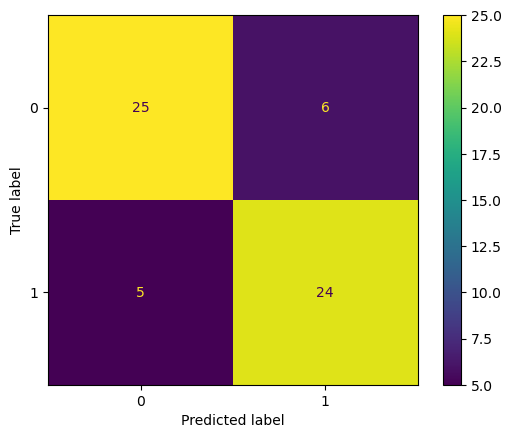

In [43]:
# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(test_chd_df_thal['chd'], test_chd_df_thal['predict_l_thal'])
plt.show()

In [44]:
# Print classification report
print(classification_report(test_chd_df_thal['chd'], test_chd_df_thal['predict_l_thal'], zero_division=0))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        31
           1       0.80      0.83      0.81        29

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



In our confusion matrix for "thal" feature we have a F1 score of 0.82 for negative CHD, and 0.81 for positive CHD, with an accuracy of 0.82.

#### Simple Linear Regression - ca
Let's also take a look at the full statistics for "ca" in our linear regression model.

We see the p-value is below the threshold of 0.05 and the confidence interval does not include zero.

In [45]:
chd_l_ca = smf.ols(formula='chd~ca', data=train_chd_df).fit()
chd_l_ca.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    chd   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     69.42
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           6.16e-15
Time:                        16:38:55   Log-Likelihood:                -143.90
No. Observations:                 242   AIC:                             291.8
Df Residuals:                     240   BIC:                             298.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2868      0.035      8.257      0.000       0.218       0.355
ca             0.2553      0.031      8.332      0.000       0.195       0.316
==============================================================================
Omnibus:                       46.034   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.790
Skew:                           0.306   Prob(JB):                      0.00101
Kurtosis:                       2.004   Cond. No.                         1.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### How well does our linear model predict CHD using "ca"?

We need to add a prediction column to the test dataframe that we can use to create a confusion matrix.

In [46]:
# Make prediction from the test set using the parameters from the model
test_chd_df_ca = test_chd_df.copy()
test_chd_df_ca['l_ca_y_hat'] = (chd_l_ca.params[0] + chd_l_ca.params[1]*test_chd_df['ca'])

# Use a threshold of greater than or equal to 0.5 to predict CHD
test_chd_df_ca['predict_l_ca'] = np.where(test_chd_df_ca['l_ca_y_hat'] >= 0.5, 1.0, 0.0)
test_chd_df_ca.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chd,l_ca_y_hat,predict_l_ca
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,0,0.286809,0.0
13,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0,0,0.286809,0.0
15,57,1,3,150,168,0,0,174,0,1.6,1,0,3,0,0,0.286809,0.0
19,49,1,2,130,266,0,0,171,0,0.6,1,0,3,0,0,0.286809,0.0
21,58,0,1,150,283,1,2,162,0,1.0,1,0,3,0,0,0.286809,0.0


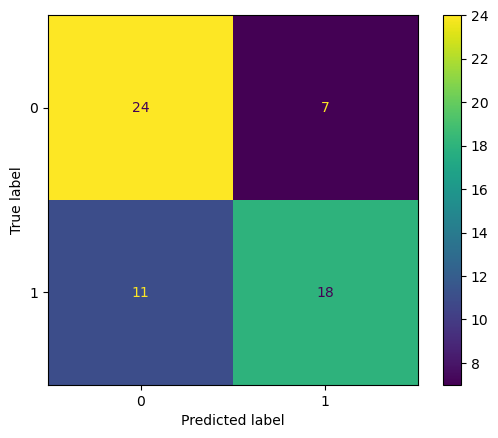

In [47]:
# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(test_chd_df_ca['chd'], test_chd_df_ca['predict_l_ca'])
plt.show()

In [48]:
# Print classification report
print(classification_report(test_chd_df_ca['chd'], test_chd_df_ca['predict_l_ca'], zero_division=0))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73        31
           1       0.72      0.62      0.67        29

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60



In our confusion matrix for "ca" feature we have a F1 score of 0.73 for negative CHD, and 0.67 for positive CHD, with an accuracy of 0.70. This is not as good as our results for the "thal" feature.

In our next section I will explore multiple linear regression models to see if we can improve on these results.

### Multiple Linear Regression

As it was always unlikely one feature could predict CHD well, let's see if including additional factors improves the results. We will start with a simple relationship between all of the features. From our earlier correlation matrix we noted that "slope" and "oldpeak" were highly correlated with a correlation coeficient of 0.58. We do not want both of these features in our model. I will drop "slope" as "oldpeak" had a slightly higher R-squared value in the initial simple linear regression model.

In [67]:
model_ml_1 = smf.ols(formula='chd~age+sex+cp+trestbps+chol+fbs+restecg+thalach+exang+oldpeak+ca+thal', data=train_chd_df).fit()
model_ml_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    chd   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     20.37
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           5.42e-30
Time:                        16:57:48   Log-Likelihood:                -86.749
No. Observations:                 242   AIC:                             199.5
Df Residuals:                     229   BIC:                             244.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1015      0.353     -0.287      0.774      -0.797       0.594
age           -0.0013      0.003     -0.400      0.689      -0.007       0.005
sex            0.1599      0.056      2.856      0.005       0.050       0.270
cp             0.0649      0.027      2.359      0.019       0.011       0.119
trestbps       0.0010      0.001      0.731      0.465      -0.002       0.004
chol           0.0006      0.000      1.119      0.264      -0.000       0.002
fbs           -0.0611      0.071     -0.866      0.387      -0.200       0.078
restecg        0.0414      0.024      1.713      0.088      -0.006       0.089
thalach       -0.0030      0.001     -2.314      0.022      -0.006      -0.000
exang          0.1563      0.059      2.672      0.008       0.041       0.272
oldpeak        0.0563      0.022      2.570      0.011       0.013       0.100
ca             0.1421      0.028      5.032      0.000       0.086       0.198
thal           0.0528      0.014      3.671      0.000       0.024       0.081
==============================================================================
Omnibus:                        4.910   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.086   Jarque-Bera (JB):                4.721
Skew:                           0.340   Prob(JB):                       0.0944
Kurtosis:                       3.076   Cond. No.                     4.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We now have a R-squared value which is more promising. We also have a significant F-statistic. When there is no relationship between the response and predictors the F-statistic will be close to one. If there is a relationship the F-statistic will be greater than one. Let's remove features that are not statistically significant at the p = 0.05 level.

In [72]:
model_ml_2 = smf.ols(formula='chd~sex+cp+restecg+thalach+exang+oldpeak+ca+thal', data=train_chd_df).fit()
model_ml_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    chd   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     30.41
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           2.53e-32
Time:                        16:58:36   Log-Likelihood:                -88.125
No. Observations:                 242   AIC:                             194.2
Df Residuals:                     233   BIC:                             225.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0386      0.225      0.172      0.864      -0.404       0.482
sex            0.1428      0.054      2.648      0.009       0.037       0.249
cp             0.0645      0.027      2.377      0.018       0.011       0.118
restecg        0.0467      0.024      1.980      0.049       0.000       0.093
thalach       -0.0026      0.001     -2.239      0.026      -0.005      -0.000
exang          0.1654      0.058      2.855      0.005       0.051       0.280
oldpeak        0.0583      0.022      2.692      0.008       0.016       0.101
ca             0.1429      0.027      5.268      0.000       0.089       0.196
thal           0.0535      0.014      3.777      0.000       0.026       0.081
==============================================================================
Omnibus:                        5.756   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.484
Skew:                           0.358   Prob(JB):                       0.0644
Kurtosis:                       3.175   Cond. No.                     1.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our R-squared value has been reduced slightly but the F-statistic is still significant and the confidence intervals do not include zero.

#### Interaction Terms
What about interaction terms? Interaction terms investigate whether the relationship between the target and the independent variable changes depending on the value of another independent variable. I will try all combinations of the reduced set of features.

In [74]:
model_ml_2 = smf.ols(formula='chd ~ sex+cp+restecg+thalach+exang+oldpeak+ca+thal+sex:cp+sex:restecg+sex:thalach+sex:exang+sex:oldpeak+sex:ca+sex:thal+cp:restecg+cp:thalach+cp:exang+cp:oldpeak+cp:ca+cp:thal+restecg:thalach+restecg:exang+restecg:oldpeak+restecg:ca+restecg:thal+thalach:exang+thalach:oldpeak+thalach:ca+thalach:thal+exang:oldpeak+exang:ca+exang:thal+oldpeak:ca+oldpeak:thal+ca:thal', data=train_chd_df).fit()
model_ml_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    chd   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     8.367
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           1.68e-24
Time:                        17:03:52   Log-Likelihood:                -65.264
No. Observations:                 242   AIC:                             204.5
Df Residuals:                     205   BIC:                             333.6
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.8075      0.927      0.871      0.385      -1.020       2.635
sex                 1.8090      0.605      2.993      0.003       0.617       3.001
cp                 -0.1984      0.218     -0.909      0.364      -0.629       0.232
restecg            -0.4228      0.251     -1.687      0.093      -0.917       0.071
thalach            -0.0063      0.005     -1.219      0.224      -0.017       0.004
exang               0.0830      0.620      0.134      0.894      -1.139       1.306
oldpeak            -0.0150      0.229     -0.065      0.948      -0.467       0.437
ca                  0.0847      0.282      0.301      0.764      -0.470       0.640
thal               -0.1071      0.143     -0.751      0.454      -0.388       0.174
sex:cp             -0.1009      0.079     -1.272      0.205      -0.257       0.055
sex:restecg         0.0232      0.062      0.376      0.708      -0.099       0.145
sex:thalach        -0.0080      0.003     -2.617      0.010      -0.014      -0.002
sex:exang          -0.3299      0.161     -2.052      0.041      -0.647      -0.013
sex:oldpeak         0.0126      0.058      0.215      0.830      -0.103       0.128
sex:ca              0.0267      0.073      0.367      0.714      -0.117       0.170
sex:thal           -0.0245      0.048     -0.511      0.610      -0.119       0.070
cp:restecg          0.0711      0.029      2.487      0.014       0.015       0.127
cp:thalach          0.0010      0.001      0.815      0.416      -0.001       0.003
cp:exang            0.1242      0.075      1.659      0.099      -0.023       0.272
cp:oldpeak         -0.0159      0.026     -0.604      0.547      -0.068       0.036
cp:ca              -0.0015      0.037     -0.039      0.969      -0.075       0.072
cp:thal             0.0224      0.017      1.302      0.194      -0.011       0.056
restecg:thalach     0.0014      0.001      1.107      0.270      -0.001       0.004
restecg:exang      -0.0628      0.063     -1.003      0.317      -0.186       0.061
restecg:oldpeak    -0.0357      0.023     -1.522      0.129      -0.082       0.011
restecg:ca          0.0660      0.031      2.122      0.035       0.005       0.127
restecg:thal        0.0047      0.016      0.286      0.775      -0.027       0.037
thalach:exang      -0.0011      0.003     -0.347      0.729      -0.007       0.005
thalach:oldpeak     0.0008      0.001      0.658      0.511      -0.002       0.003
thalach:ca          0.0008      0.001      0.523      0.602      -0.002       0.004
thalach:thal        0.0008      0.001      1.080      0.282      -0.001       0.002
exang:oldpeak       0.0463      0.057      0.815      0.416      -0.066       0.158
exang:ca           -0.0131      0.067     -0.195      0.846      -0.146       0.120
exang:thal          0.0022      0.034      0.064      0.949

I will remove interactions and features that are not significant at the p = 0.05 level.

In [106]:
model_ml_2 = smf.ols(formula='chd ~ sex+cp+exang+oldpeak+thal+sex:thalach+sex:exang+restecg:ca', data=train_chd_df).fit()
model_ml_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    chd   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     34.18
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           2.34e-35
Time:                        17:15:56   Log-Likelihood:                -80.698
No. Observations:                 242   AIC:                             179.4
Df Residuals:                     233   BIC:                             210.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.3367      0.095     -3.547      0.000      -0.524      -0.150
sex             1.0139      0.212      4.778      0.000       0.596       1.432
cp              0.0522      0.026      1.977      0.049       0.000       0.104
exang           0.4301      0.104      4.150      0.000       0.226       0.634
oldpeak         0.0596      0.021      2.847      0.005       0.018       0.101
thal            0.0583      0.014      4.278      0.000       0.031       0.085
sex:thalach    -0.0051      0.001     -3.914      0.000      -0.008      -0.003
sex:exang      -0.3982      0.118     -3.367      0.001      -0.631      -0.165
restecg:ca      0.0916      0.015      6.219      0.000       0.063       0.121
==============================================================================
Omnibus:                        4.671   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                4.657
Skew:                           0.339   Prob(JB):                       0.0975
Kurtosis:                       2.952   Cond. No.                     1.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### How well does this multiple linear model predict CHD?

At this point, we still do not have a great R-squared value but it is much better than our best simple linear model. Our F-statistic is significant and our confidence intervals do not include zero. 

We need to add a prediction column to the test dataframe so that we can use to create a confusion matrix.


In [107]:
# Make prediction from the test set using the parameters from the model
test_chd_df_ml = test_chd_df.copy()
test_chd_df_ml['ml_y_hat'] = model_ml_2.params[0] + model_ml_2.params[1]*test_chd_df['ca'] + model_ml_2.params[2]*test_chd_df['cp']*test_chd_df['thal']

# Use a threshold of greater than or equal to 0.5 to predict CHD
test_chd_df_ml['predict_ml'] = np.where(test_chd_df_ml['ml_y_hat'] >= 0.5, 1.0, 0.0)
test_chd_df_ml.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chd,ml_y_hat,predict_ml
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,0,-0.023261,0.0
13,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0,0,0.394707,0.0
15,57,1,3,150,168,0,0,174,0,1.6,1,0,3,0,0,0.133477,0.0
19,49,1,2,130,266,0,0,171,0,0.6,1,0,3,0,0,-0.023261,0.0
21,58,0,1,150,283,1,2,162,0,1.0,1,0,3,0,0,-0.179999,0.0


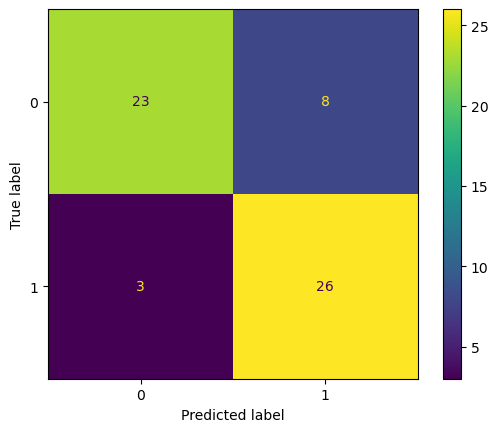

In [108]:
# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(test_chd_df_ml['chd'], test_chd_df_ml['predict_ml'])
plt.show()

In [109]:
# Print classification report
print(classification_report(test_chd_df_ml['chd'], test_chd_df_ml['predict_ml'], zero_division=0))

              precision    recall  f1-score   support

           0       0.88      0.74      0.81        31
           1       0.76      0.90      0.83        29

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.83      0.82      0.82        60



This looks like a promising result. We have an F1 score of 0.81 for negative CHD and 0.83 for positive CHD, with an accuracy of 0.82.

This is a better result than we had with our simple linear regression model. Let's see if we can improve our results by trying out logistic regression.

### Logistic Regression

In our discussion of models, I predicted logistic regression was the better model for our binary classification task. It is recommended to avoid the use of highly correlated variables in this model. In the correlation matrix, "slope" has a coefficient of 0.58 with "oldpeak". I will drop "slope" as "oldpeak" had a slightly higher R-squared value in the initial simple linear regression model.

In [113]:
# Drop feature "slope" due to highly correlated variables
train_chd_df_lr = train_chd_df.drop(['slope'], axis=1)
train_chd_df_lr.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,num,chd
219,59,1,4,138,271,0,2,182,0,0.0,0,3,0,0
244,60,0,3,120,178,1,0,96,0,0.0,0,3,0,0
76,60,1,4,125,258,0,2,141,1,2.8,1,7,1,1
107,57,1,3,128,229,0,2,150,0,0.4,1,7,1,1
56,50,1,3,140,233,0,0,163,0,0.6,1,7,1,1


In [114]:
test_chd_df_lr = test_chd_df.drop(['slope'], axis=1)
test_chd_df_lr.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,num,chd
0,63,1,1,145,233,1,2,150,0,2.3,0,6,0,0
13,44,1,2,120,263,0,0,173,0,0.0,0,7,0,0
15,57,1,3,150,168,0,0,174,0,1.6,0,3,0,0
19,49,1,2,130,266,0,0,171,0,0.6,0,3,0,0
21,58,0,1,150,283,1,2,162,0,1.0,0,3,0,0


In [115]:
# Prep the data for logistic regression. We use all features.
feature_lr_cols = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','ca','thal']
X_train = train_chd_df_lr[feature_lr_cols]
y_train = train_chd_df_lr.chd

X_test = test_chd_df_lr[feature_lr_cols]
y_test = test_chd_df_lr.chd

# Fit to logistic regression model
model_lr = sklearn.linear_model.LogisticRegression(max_iter=4000).fit(X_train, y_train)
print('Prediction accuracy', sklearn.metrics.accuracy_score(model_lr.predict(X_test), y_test))

Prediction accuracy 0.9333333333333333


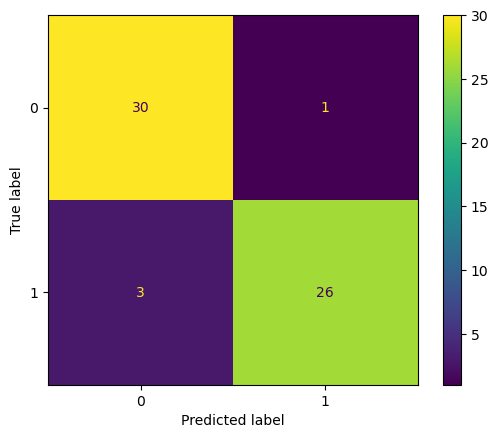

In [117]:
# Use logistic regression to predict instances from the test set and store it
y_hat = model_lr.predict(X_test)

# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_hat)
plt.show()

In [118]:
# Print summary
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        31
           1       0.96      0.90      0.93        29

    accuracy                           0.93        60
   macro avg       0.94      0.93      0.93        60
weighted avg       0.94      0.93      0.93        60



So far this is the best result we have seen. We have an accuracy of 0.93 and our precision and F1 scores are high. What could we do to try to improve our logistic regression results?

#### Recursive Feature Elimination (RFE) 

RFE is a feature selection technique starts with all the features and removes the least important features one by one until we have a specified number of features left.

Our original dataset started with 13 features, and from our exploratory data analysis we narrowed the list down to 8 features we thought had the most influence on a CHD diagnosis. Let's test that with the RFE class from the sklearn.feature_selection module.

In [120]:
# Use RFE to select the top 8 features
lr = sklearn.linear_model.LogisticRegression(max_iter=4000)
rfe = RFE(lr, n_features_to_select=8)
rfe = rfe.fit(X_train, y_train)
rfe_8_features = []
for i in range(len(feature_lr_cols)):
    if rfe.support_[i]:
        rfe_8_features.append(feature_lr_cols[i])
print(rfe_8_features)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'ca', 'thal']


**Our top 8 features are: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'ca', 'thal']**

How does this list compare to what we predicted were the most likely features to affect the diagnosis of CHD?

We predicted: [sex, cp, slope, thalach, exang, ca, thal, oldpeak] \
RFE prediction: [sex, cp, fbs, restecg, exang, oldpeak, ca, thal]

We predicted 6 out of the 8 features returned from the RFE analysis.

Let's model this group and compare results to the previous model.

In [121]:
# Prep the data for logistic regression. Use 8 features.
feature_lr_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'ca', 'thal']
X_train = train_chd_df_lr[feature_lr_cols]
y_train = train_chd_df_lr.chd

X_test = test_chd_df_lr[feature_lr_cols]
y_test = test_chd_df_lr.chd

# Fit to logistic regression model
model_lr = sklearn.linear_model.LogisticRegression(max_iter=4000).fit(X_train, y_train)
print('Prediction accuracy', sklearn.metrics.accuracy_score(model_lr.predict(X_test), y_test))

Prediction accuracy 0.9166666666666666


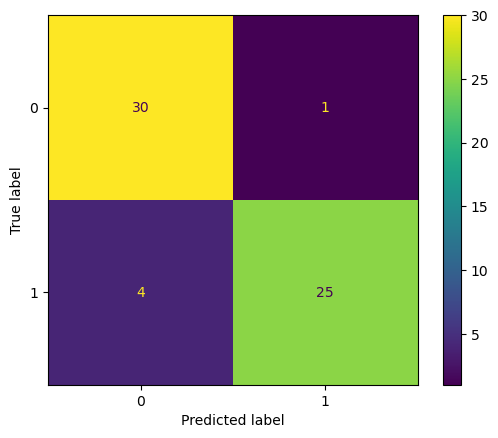

In [122]:
# Use logistic regression to predict instances from the test set and store it
y_hat = model_lr.predict(X_test)

# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_hat)
plt.show()

In [123]:
# Print summary
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        31
           1       0.96      0.86      0.91        29

    accuracy                           0.92        60
   macro avg       0.92      0.91      0.92        60
weighted avg       0.92      0.92      0.92        60



Our scores and accuracy is a little less than when we used 12 features. One of the features is "sex" which does not require a patient to undergo a test. That means only 7 tests would be required in order to predict the likelihood of a positive CHD. Although 7 tests are an improvement, let's see if we can reduce the list further while keeping the accuracy reasonable. 

In [125]:
# Use RFE to select the top 7 features
lr = sklearn.linear_model.LogisticRegression(max_iter=4000)
rfe = RFE(lr, n_features_to_select=7)
rfe = rfe.fit(X_train, y_train)
rfe_7_features = []
for i in range(len(feature_lr_cols)):
    if rfe.support_[i]:
        rfe_7_features.append(feature_lr_cols[i])
print(rfe_7_features)

# Prep the data for logistic regression. Use 7 features.
feature_lr_cols = ['sex', 'cp', 'restecg', 'exang', 'oldpeak', 'ca', 'thal']
X_train = train_chd_df_lr[feature_lr_cols]
y_train = train_chd_df_lr.chd

X_test = test_chd_df_lr[feature_lr_cols]
y_test = test_chd_df_lr.chd

# Fit to logistic regression model
model_lr = sklearn.linear_model.LogisticRegression(max_iter=4000).fit(X_train, y_train)
print('Prediction accuracy', sklearn.metrics.accuracy_score(model_lr.predict(X_test), y_test))

['sex', 'cp', 'restecg', 'exang', 'oldpeak', 'ca', 'thal']
Prediction accuracy 0.9166666666666666


In [129]:
# Use RFE to select the top 6 features
lr = sklearn.linear_model.LogisticRegression(max_iter=4000)
rfe = RFE(lr, n_features_to_select=6)
rfe = rfe.fit(X_train, y_train)
rfe_6_features = []
for i in range(len(feature_lr_cols)):
    if rfe.support_[i]:
        rfe_6_features.append(feature_lr_cols[i])
print(rfe_6_features)

# Prep the data for logistic regression. Use 6 features.
feature_lr_cols = ['sex', 'cp', 'restecg', 'exang', 'oldpeak', 'ca']
X_train = train_chd_df_lr[feature_lr_cols]
y_train = train_chd_df_lr.chd

X_test = test_chd_df_lr[feature_lr_cols]
y_test = test_chd_df_lr.chd

# Fit to logistic regression model
model_lr = sklearn.linear_model.LogisticRegression(max_iter=4000).fit(X_train, y_train)
print('Prediction accuracy', sklearn.metrics.accuracy_score(model_lr.predict(X_test), y_test))

['sex', 'cp', 'restecg', 'exang', 'oldpeak', 'ca']
Prediction accuracy 0.85


In [130]:
# Use RFE to select the top 5 features
lr = sklearn.linear_model.LogisticRegression(max_iter=4000)
rfe = RFE(lr, n_features_to_select=5)
rfe = rfe.fit(X_train, y_train)
rfe_5_features = []
for i in range(len(feature_lr_cols)):
    if rfe.support_[i]:
        rfe_5_features.append(feature_lr_cols[i])
print(rfe_5_features)

# Prep the data for logistic regression. Use 5 features.
feature_lr_cols = ['sex', 'cp', 'exang', 'oldpeak', 'ca']
X_train = train_chd_df_lr[feature_lr_cols]
y_train = train_chd_df_lr.chd

X_test = test_chd_df_lr[feature_lr_cols]
y_test = test_chd_df_lr.chd

# Fit to logistic regression model
model_lr = sklearn.linear_model.LogisticRegression(max_iter=4000).fit(X_train, y_train)
print('Prediction accuracy', sklearn.metrics.accuracy_score(model_lr.predict(X_test), y_test))

['sex', 'cp', 'exang', 'oldpeak', 'ca']
Prediction accuracy 0.85


In [133]:
# Use RFE to select the top 4 features
lr = sklearn.linear_model.LogisticRegression(max_iter=4000)
rfe = RFE(lr, n_features_to_select=4)
rfe = rfe.fit(X_train, y_train)
rfe_4_features = []
for i in range(len(feature_lr_cols)):
    if rfe.support_[i]:
        rfe_4_features.append(feature_lr_cols[i])
print(rfe_4_features)

# Prep the data for logistic regression. Use 4 features.
feature_lr_cols = ['sex', 'exang', 'oldpeak', 'ca']
X_train = train_chd_df_lr[feature_lr_cols]
y_train = train_chd_df_lr.chd

X_test = test_chd_df_lr[feature_lr_cols]
y_test = test_chd_df_lr.chd

# Fit to logistic regression model
model_lr = sklearn.linear_model.LogisticRegression(max_iter=4000).fit(X_train, y_train)
print('Prediction accuracy', sklearn.metrics.accuracy_score(model_lr.predict(X_test), y_test))

['sex', 'exang', 'oldpeak', 'ca']
Prediction accuracy 0.8


Once we reduced our features to 6, there was a noticeable drop in accuracy. I ran RFE down to 4 features even though the prediction accuracy had dropped to 0.8 as it is interesting to see what the model predicted are the top 4 features. For a patient this is actually only 3 tests which means an accuracy of 0.8 may be good enough to determine if the patient should undergo a more invasive test to confirm CHD. 

Let's look a little more into the results for the top 4 features.

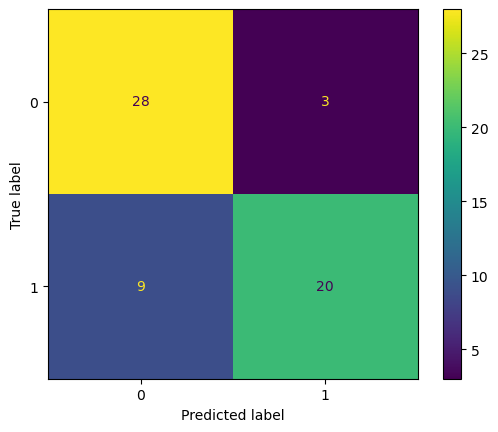

In [134]:
# Use logistic regression to predict instances from the test set and store it
y_hat = model_lr.predict(X_test)

# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_hat)
plt.show()

In [135]:
# Print summary
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82        31
           1       0.87      0.69      0.77        29

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60



We note the precision and F1 scores are not as high as in the top result for logistic regression where we included all 12 features. In a clinical environment this may be useful as a filtering method to determine who should undergo the invasive but definitive test of a coronary angiography.

## Discussion and Conclusion

The goal of this project was to attempt to predict if a person has CHD using the 13 features in the dataset. These features are non-invasive but are not as reliable as the accepted gold standard of coronary angiography. As a secondary task, I wanted to investigate if I could narrow down the features to a smaller subset while still predicting CHD reliably. This would allow patients to only undergo the most important tests, saving time and money for the patient.

After the exploratory data analysis I predicted the following 8 features showed the most promise in predicting the diagnosis of CHD:
* Sex
* Chest pain type (cp)
* The slope of the peak exercise ST segment (slope)
* Maximum heart rate achieved (thalach)
* Exercise induced angina (exang)
* Number of major vessels colored by fluoroscopy (ca)
* Thallium stress test (thal)
* ST depression induced by exercise relative to rest (oldpeak)

The first model used was simple linear regression.

The features of "thal" and "ca" showed the highest R-squared values at approximately 0.25 and 0.22 respectively. The investigation of the full statistics for these models showed accuracy of 0.82 for "thal" and 0.70 for "ca."

I next investigated multiple linear regression. 

When using 12 features ("slope" was dropped due to highly correlated relationship) our model produced a R-squared value of 0.516 and a F-statistic of 20.37. I reduced the number of features to remove those that were not statistically significant at the p=0.05 level and I was left with the following 8 features: [sex, cp, restecg, thalach, exang, oldpeak, ca, thal]. This model had an R-squared value of 0.511 and F-statistic of 30.41.

This was promising and much improved over the simple linear models. I next looked at including interaction terms. After including all interactions from the 8 features we had in the last step and then removing those that were not statistically significant at the p=0.05 level I was left with the following model: chd ~ sex + cp + exang + oldpeak + thal + sex:thalach + sex:exang + restecg:ca.

For this interaction model there was a R-squared of 0.540 and an F-statistic of 34.18. This model had an F1 score of 0.81 for negative CHD and 0.83 for positive CHD, with an accuracy of 0.82.

The multiple linear regression with interaction terms was a noticeable improvement over the simple linear regression models.

The final model I tested was logistic regression. I started with the 12 features that I also started with in multiple linear regression. The initial prediction accuracy was approximately 0.933 which was an improvement over my best multiple linear regression model.

One of my tasks in the project was to try to determine if a subset of the features could also be used to predict CHD reliably. I used recursive feature elimination (RFE) on the logistic regression model. The top 8 features found by RFE were: [sex, cp, fbs, restecg, exang, oldpeak, ca, thal]. My prediction of the most important features during the exploratory data analysis found 6 of the 8 returned from RFE. Using only these 8 features the accuracy was slightly lower at 0.92 than the first model which used 12 features.

This was a significant result in that a patient may only need 8 data points in order to receive a reliable prediction of CHD. My next question was are we able to reduce this list of features even more and still have our predictions accurate at a reasonable level?

I reduced the features to 4 which still had an accuracy of 0.8. Would this model be useful in a clinical setting in order to filter out patients who are likely to have CHD? If positive these patients could then undergo the additional non-invasive tests or have the invasive coronary angiography for a definitive diagnosis.

The 4 features that were found by RFE to be the best predictors:
* sex
* exang - exercise induced angina
* oldpeak - ST depression induced by exercise relative to rest
* ca - number of major vessels colored by fluoroscopy

In summary, the best model for prediction of CHD was logistic regression using 12 features. The second best was logistic regression using 8 features.

**Improvements and further work:**
* Test additional models such as KNN, SVM (support vector machines), and Decision Tree.
* Additional investigation on highly correlated features including collinearity among three or more variables (multicollinearity).

## References
<span id="fn1">1. https://www.nhlbi.nih.gov/health/coronary-heart-disease</span> \
<span id="fn2">2. https://www.ucsfhealth.org/conditions/coronary-artery-disease/diagnosis</span> \
<span id="fn3">3. Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.</span> \
<span id="fn4">4. https://www.cdc.gov/diabetes/basics/getting-tested.html</span> \
<span id="fn5">5. https://www.ahajournals.org/doi/10.1161/01.CIR.93.8.1520</span> \
<span id="fn6">6. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8642660/</span> \
<span id="fn7">7. https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings</span> \
<span id="fn8">8. https://www.hopkinsmedicine.org/health/conditions-and-diseases/high-cholesterol/cholesterol-in-the-blood</span> \
